In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import seaborn
import src
import os

In [23]:
def read_dataframe(kind):
    data = dict()
    for num_topics in range(25, 525, 25):
        projects = src.main.load_projects({"level": "method", "num_topics": num_topics})
        subdata = dict()
        for project in projects:
            ranks = src.main.read_ranks(project, kind)
            with open(os.path.join(project.full_path, 'ids.txt')) as f:
                ids = [x.strip() for x in f.readlines()]
            frms = [x for x,y,z in src.main.get_frms(ranks) if y in ids]
            mrr = src.utils.calculate_mrr(frms)
            subdata[project.printable_name + " "  + project.version] = mrr
        data[num_topics] = subdata
    return pandas.DataFrame(data)

In [ ]:
lda = read_dataframe("release_lda")
vec = read_dataframe("release_vec")
vec_sums = read_dataframe("release_vec_sums")

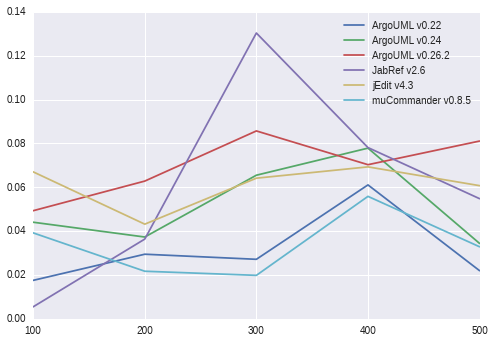

In [19]:
lda.T.plot(xticks=[100,200,300,400,500])

In [6]:
lda

,100,200,300,400,500
ArgoUML v0.22,0.017532,0.029460,0.027142,0.061079,0.021953
ArgoUML v0.24,0.044053,0.037306,0.065500,0.077855,0.034382
ArgoUML v0.26.2,0.049304,0.062822,0.085700,0.070299,0.081081
JabRef v2.6,0.005463,0.036370,0.130358,0.078107,0.054799
jEdit v4.3,0.067034,0.043171,0.064146,0.069303,0.060734
muCommander v0.8.5,0.039195,0.021695,0.019819,0.055850,0.032859


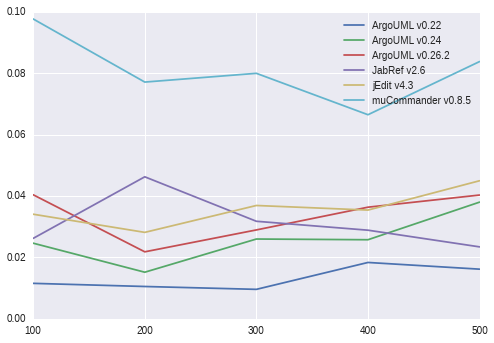

In [22]:
vec.T.plot(xticks=[100,200,300,400,500])

In [8]:
vec

,100,200,300,400,500
ArgoUML v0.22,0.011549,0.010527,0.009596,0.018356,0.016174
ArgoUML v0.24,0.024638,0.015181,0.025993,0.025763,0.038016
ArgoUML v0.26.2,0.040417,0.021824,0.028957,0.036367,0.040324
JabRef v2.6,0.026205,0.046265,0.031776,0.028872,0.023437
jEdit v4.3,0.034078,0.028161,0.036920,0.035427,0.044982
muCommander v0.8.5,0.097701,0.077134,0.079985,0.066495,0.083819


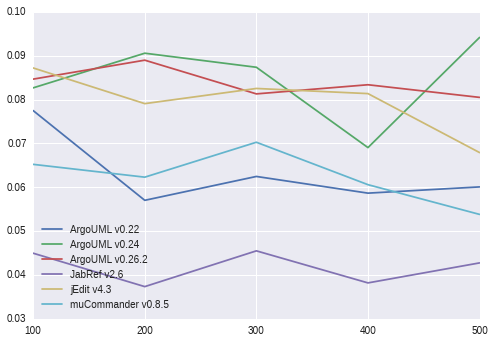

In [21]:
vec_sums.T.plot(xticks=[100,200,300,400,500])

In [10]:
vec_sums

,100,200,300,400,500
ArgoUML v0.22,0.077488,0.057025,0.062467,0.058661,0.060084
ArgoUML v0.24,0.082675,0.090578,0.087371,0.069051,0.094173
ArgoUML v0.26.2,0.084667,0.088990,0.081300,0.083383,0.080502
JabRef v2.6,0.044958,0.037341,0.045498,0.038187,0.042750
jEdit v4.3,0.087213,0.079077,0.082536,0.081364,0.067913
muCommander v0.8.5,0.065227,0.062305,0.070269,0.060592,0.053812


In [11]:
df = pandas.DataFrame({"lda": lda.mean(), "vec": vec.mean(), "vec_sums": vec_sums.mean()})
df

,lda,vec,vec_sums
100,0.037097,0.039098,0.073705
200,0.038471,0.033182,0.069219
300,0.065444,0.035538,0.071573
400,0.068749,0.035213,0.065206
500,0.047635,0.041125,0.066539


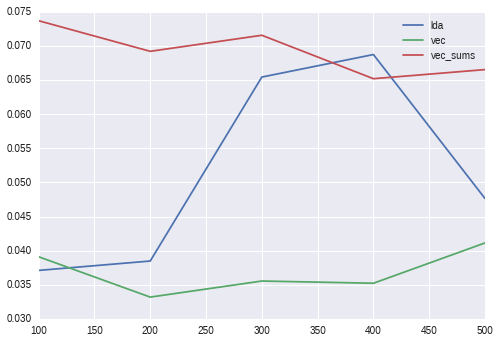

In [12]:
df.plot()

In [18]:
with open('icsme15era/tables/lda_mrr.tex', 'w') as f:
    lda.to_latex(f, float_format=lambda x: "%.4f" % x)
with open('icsme15era/tables/vec_mrr.tex', 'w') as f:
    vec.to_latex(f, float_format=lambda x: "%.4f" % x)
with open('icsme15era/tables/vec_sums_mrr.tex', 'w') as f:
    vec_sums.to_latex(f, float_format=lambda x: "%.4f" % x)


In [17]:
lda.to_latex(float_format=lambda x: "%.4f" % x)

u'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &    100 &    200 &    300 &    400 &    500 \\\\\n\\midrule\nArgoUML v0.22      & 0.0175 & 0.0295 & 0.0271 & 0.0611 & 0.0220 \\\\\nArgoUML v0.24      & 0.0441 & 0.0373 & 0.0655 & 0.0779 & 0.0344 \\\\\nArgoUML v0.26.2    & 0.0493 & 0.0628 & 0.0857 & 0.0703 & 0.0811 \\\\\nJabRef v2.6        & 0.0055 & 0.0364 & 0.1304 & 0.0781 & 0.0548 \\\\\njEdit v4.3         & 0.0670 & 0.0432 & 0.0641 & 0.0693 & 0.0607 \\\\\nmuCommander v0.8.5 & 0.0392 & 0.0217 & 0.0198 & 0.0559 & 0.0329 \\\\\n\\bottomrule\n\\end{tabular}\n'